In [1]:
from sklearn.model_selection import train_test_split
from torch.utils.data.dataloader import DataLoader
import tiktoken

from src.data_loader import load_data
from src.utils import load_config
from src import wikipedia_article_dataset
from src.models import CNN, CNNModel, MultilabelCNNModel
from src.evaluation import evaluate_model

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


## Binary Classification

In [2]:
MAX_LENGTH = 400
BATCH_SIZE = 16

EMBEDDING_DIM = 128
NUM_FILTERS = 10
FILTER_SIZES = [3, 4, 5]
NUM_CLASSES = 2
DROPOUT = 0.5

In [3]:
config = load_config("just-load")

In [4]:
df = load_data(config["data_loader"], "binary")

In [5]:
df

,text,label
0,The 2017 Hazfi Cup Final was the 30th final si...,1
1,The 3rd Parachute Brigade was an airborne forc...,0
2,III Corps is a corps of the United States Army...,0
3,"4 Months, 3 Weeks and 2 Days Romanian 4 luni, ...",0
4,The 201213 Dallas Mavericks season was the 33r...,1
...,...,...
195,4 Walls is the fourth studio album by South Ko...,0
196,"The A215 is an A road in South London, startin...",0
197,The 2 18th Battalion was an Australian Army in...,0
198,The 1st Split Partisan Detachment Serbo Croati...,0


In [6]:
X_train, X_test, y_train, y_test = train_test_split(list(df["text"]), list(df["label"]), test_size=0.2)

In [7]:
model = CNNModel(
    EMBEDDING_DIM,
    NUM_FILTERS,
    FILTER_SIZES,
    NUM_CLASSES,
    MAX_LENGTH,
    DROPOUT
)

In [8]:
model.fit(X_train, y_train, 0.001, 3, BATCH_SIZE)

Epoch: 0, loss: 0.8937224626541138
Epoch: 1, loss: 0.7454992085695267
Epoch: 2, loss: 0.6298356413841247


In [9]:
predictions = model.predict(X_test)

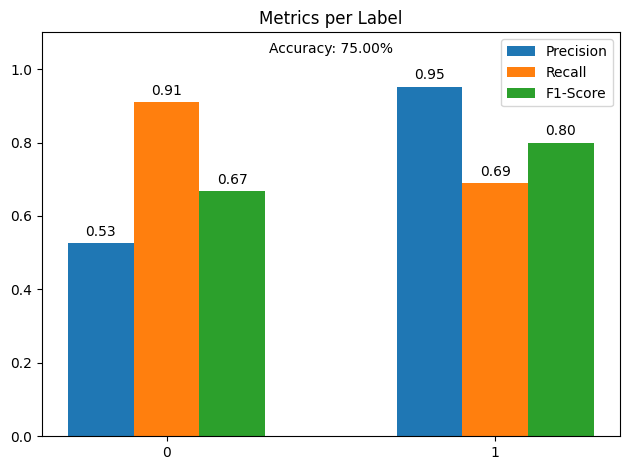

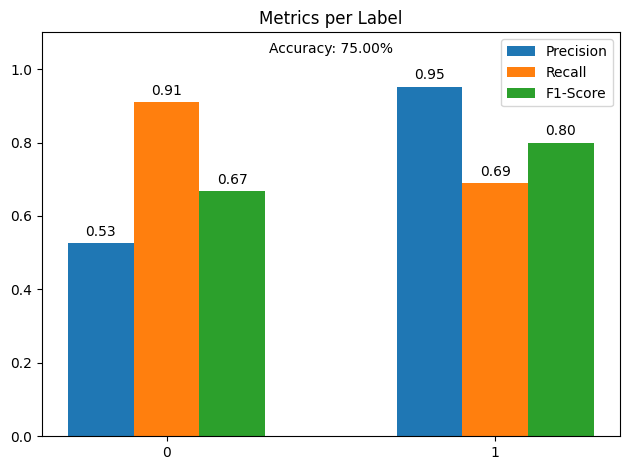

In [10]:
evaluate_model(model, X_test, y_test)

## Multilabel Classification

In [11]:
config = load_config("just-load")
df = load_data(config["data_loader"], "multilabel")
df

,Unnamed: 0,text,advert,coi,fanpov,pr,resume
0,37,15 Minutes is the 28th studio album by singer ...,0,0,1,0,0
1,91,2017 Union Budget of India is the It was prese...,0,0,0,1,0
2,27,The 7th Transportation Brigade Expeditionary i...,1,0,0,0,0
3,84,The 2014 SIU Edwardsville Cougars men's soccer...,1,0,0,0,0
4,62,The 401st Army Field Support Brigade is now lo...,1,0,0,0,0
...,...,...,...,...,...,...,...
95,92,2018 Libya migrant shipwrecks began on January...,0,0,0,1,0
96,64,The United States Air Force's 505th Command an...,1,0,0,0,0
97,47,32Red is a British online casino company licen...,1,0,0,0,0
98,95,"A.P.N.G. Enterprises, Inc. Association for the...",1,0,0,0,0


In [12]:
model = MultilabelCNNModel(
    EMBEDDING_DIM,
    NUM_FILTERS,
    FILTER_SIZES,
    MAX_LENGTH
)

texts = df["text"].tolist()
labels = df[["advert", "coi", "fanpov", "pr", "resume"]].values.tolist()

In [15]:
model.fit(texts, labels, learning_rate=0.01, num_epochs=3, batch_size=16)

Epoch 1/3, Loss: 0.6457
Epoch 2/3, Loss: 0.5920
Epoch 3/3, Loss: 0.4616


In [16]:
model.predict(texts)

[[1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 1, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 1, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0,